<a href="https://colab.research.google.com/github/jonnes-nascimento/machine_learning/blob/master/Introdu%C3%A7%C3%A3o_a_Machine_Learning_Algoritmos_N%C3%A3o_Supervisionados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o dataset e renomeando as colunas

In [2]:
import pandas as pd

# importando o dataset
uri_filmes = 'https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv'

filmes = pd.read_csv(uri_filmes)

# renomeando as colunas
filmes.columns = ['filme_id', 'titulo', 'generos']

filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Extraindo as variáveis categóricas (dummies) de gênero dos filmes

In [3]:
# Como se pode ver, na coluna 'generos' temos uma string listando vários os vários gêneros ao qual determinado filme pertence.
# O que faremos aqui é extrair esses gêneros em colunas e marcá-las de forma binária se o filme segue ou não determinado gênero.
generos = filmes.generos.str.get_dummies()

# Contatenamos os dataframes de filmes e o novo, de generos, para formar uma única base de dados
dados_dos_filmes = pd.concat([filmes, generos], axis='columns')

dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Reescalando os dados de gêneros


In [16]:
# O reescalamento dos dados nos dizem quais generos mais influenciam determinado filme
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)

print(generos.columns)
print(generos_escalados)
print(generos_escalados.shape)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698  2.59101927 ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 ...
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995  2.0807022  -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]
 [-0.05917995 -0.48060698 -0.3859485  ... -0.49125897 -0.20201972
  -0.13206534]]
(9742, 20)


# Agrupando os filmes por categorias com o KMeans

In [21]:
# este é um excelente site que exibe, de forma interativa, o funcionamento dos algoritmos de clusterização do KMeans
# https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)

print('Grupos {}'.format(modelo.labels_))

Grupos [0 0 1 ... 1 0 1]


In [25]:
print(generos)
print(generos.columns)
print(modelo.cluster_centers_)

      (no genres listed)  Action  Adventure  ...  Thriller  War  Western
0                      0       0          1  ...         0    0        0
1                      0       0          1  ...         0    0        0
2                      0       0          0  ...         0    0        0
3                      0       0          0  ...         0    0        0
4                      0       0          0  ...         0    0        0
...                  ...     ...        ...  ...       ...  ...      ...
9737                   0       1          0  ...         0    0        0
9738                   0       0          0  ...         0    0        0
9739                   0       0          0  ...         0    0        0
9740                   0       1          0  ...         0    0        0
9741                   0       0          0  ...         0    0        0

[9742 rows x 20 columns]
Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Cri

In [26]:
# transforma a array dos centros dos centroids em um dataframe do pandas para melhor visuzalizacao e manipulacao

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos

# temos uma tabela com tres linhas e 20 colunas, ou seja, 3 grupos e 20 generos em cada grupo

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.05918,0.244700,1.156639,1.808786,1.939943,0.112710,-0.312878,-0.217489,-0.595954,1.216695,-0.085940,-0.249670,0.580964,0.290077,-0.120648,-0.264490,0.252913,-0.395141,-0.167179,-0.086479
1,0.01183,-0.010871,-0.149815,-0.251059,-0.268496,0.016384,0.064017,-0.217489,0.130174,-0.162213,0.017667,0.053663,-0.085493,-0.040855,0.030080,0.061861,-0.018727,0.083576,0.027693,0.018809
2,-0.05918,-0.457322,-0.345353,-0.230558,-0.261433,-0.605349,-0.340042,4.597924,-0.799694,-0.278052,-0.094926,-0.318930,0.015544,-0.026045,-0.230667,-0.430352,-0.334435,-0.479773,-0.061510,-0.114556


# Análise gráfica dos grupos

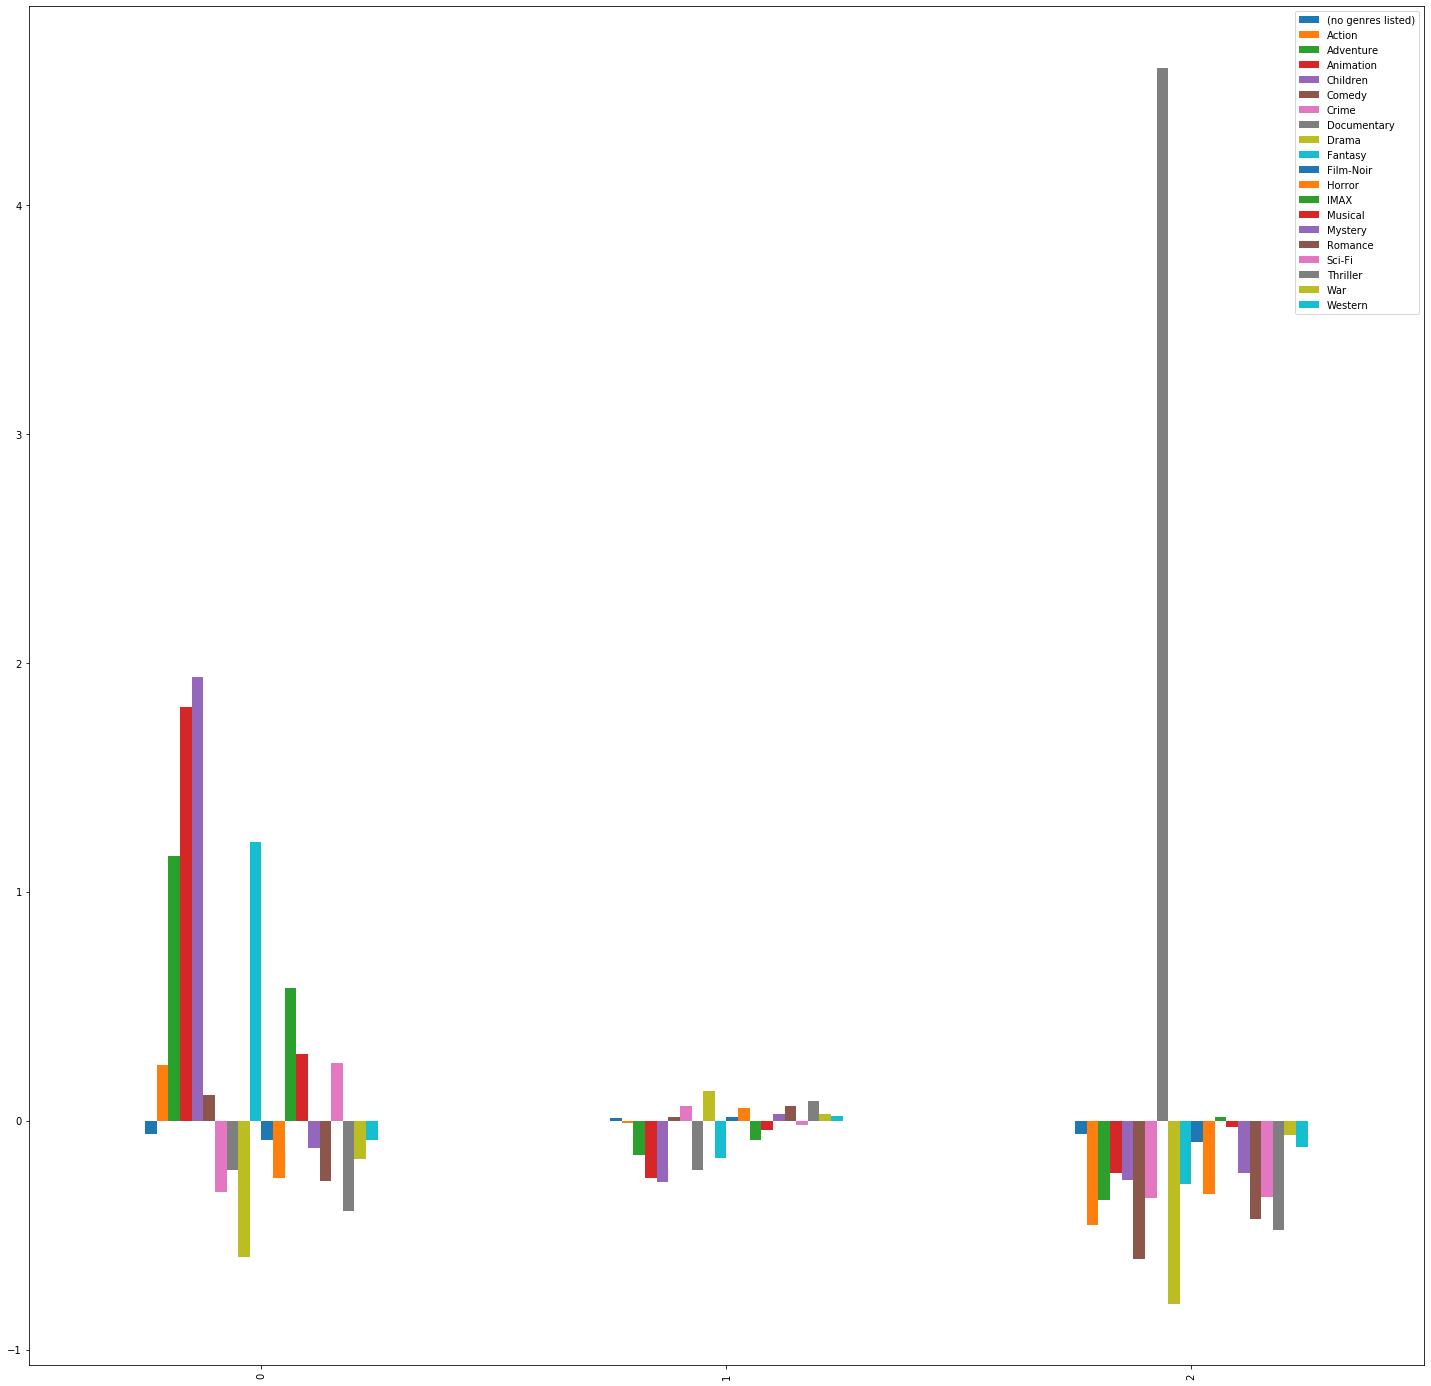

In [31]:
grupos.plot.bar(figsize=(25, 25))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f044348ed30>,
      dtype=object)

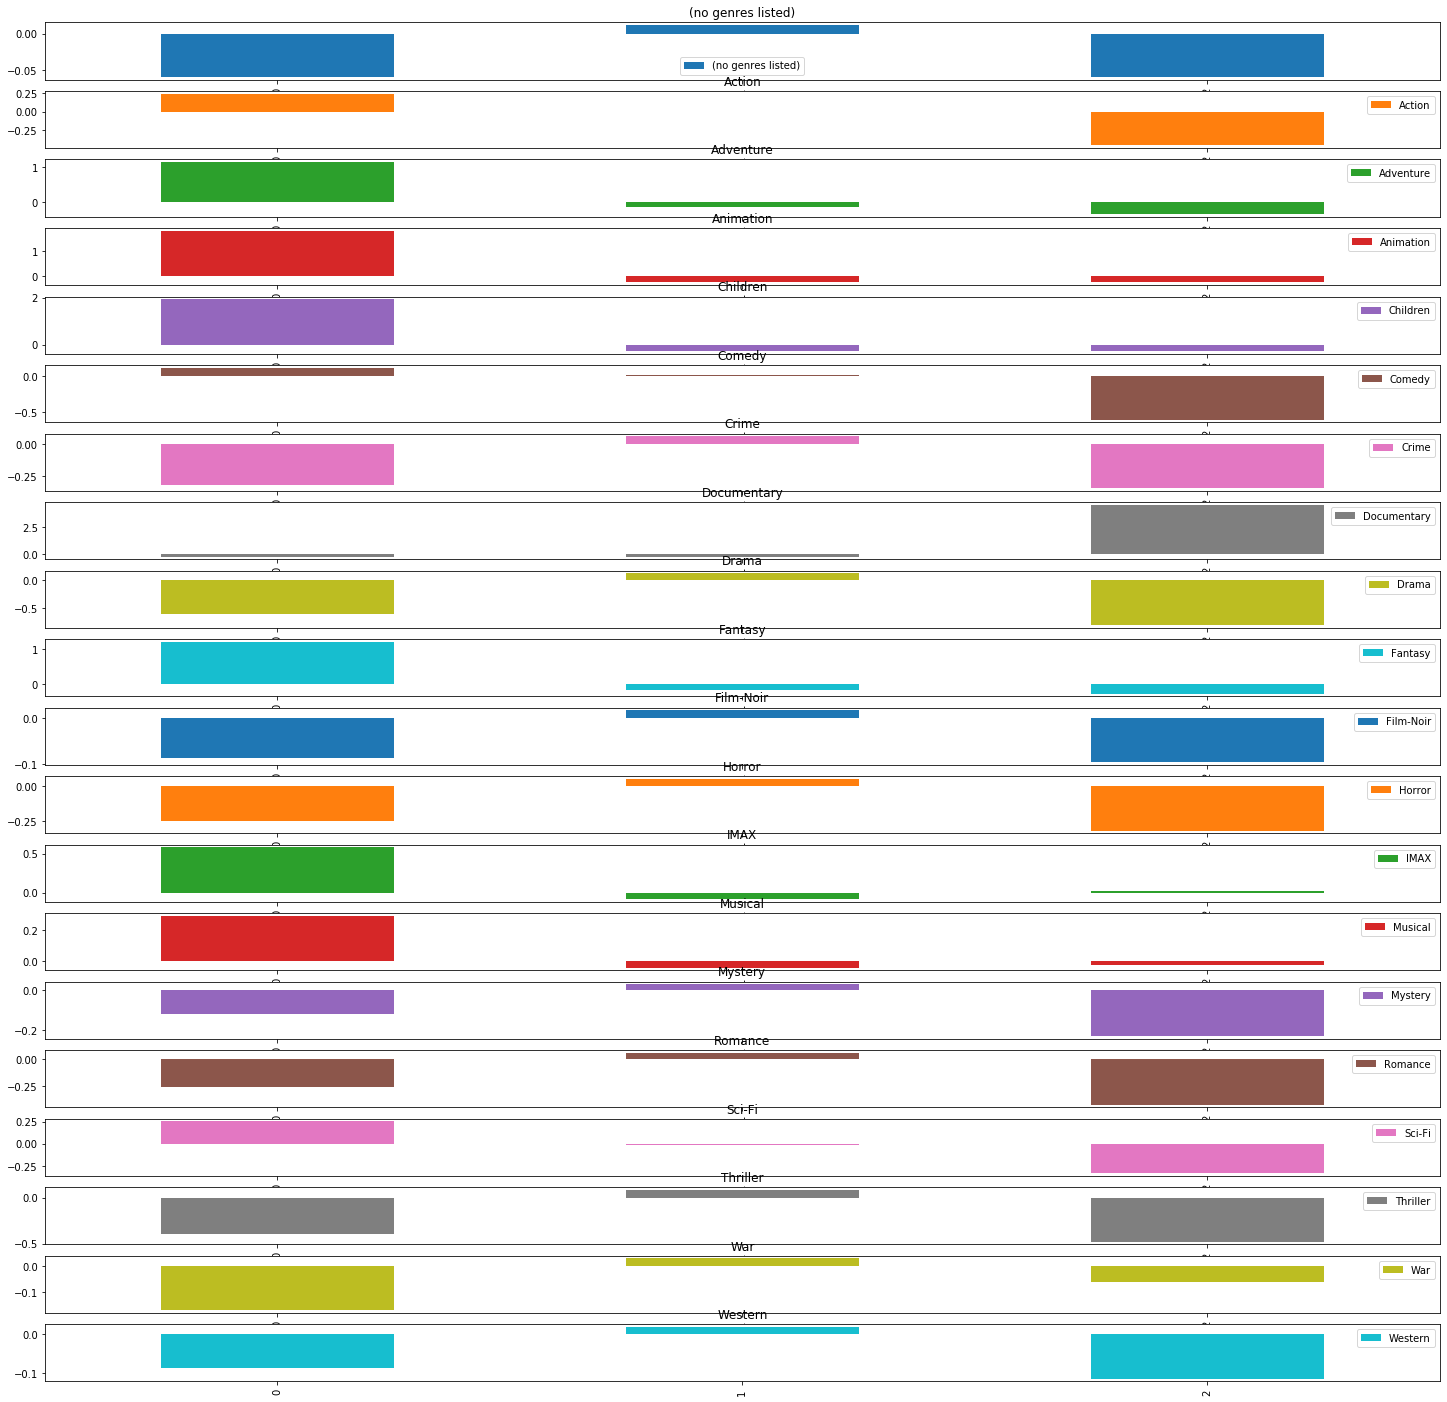

In [33]:
grupos.plot.bar(subplots=True, figsize=(25, 25), sharex=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0442ce5b00>,
      dtype=object)

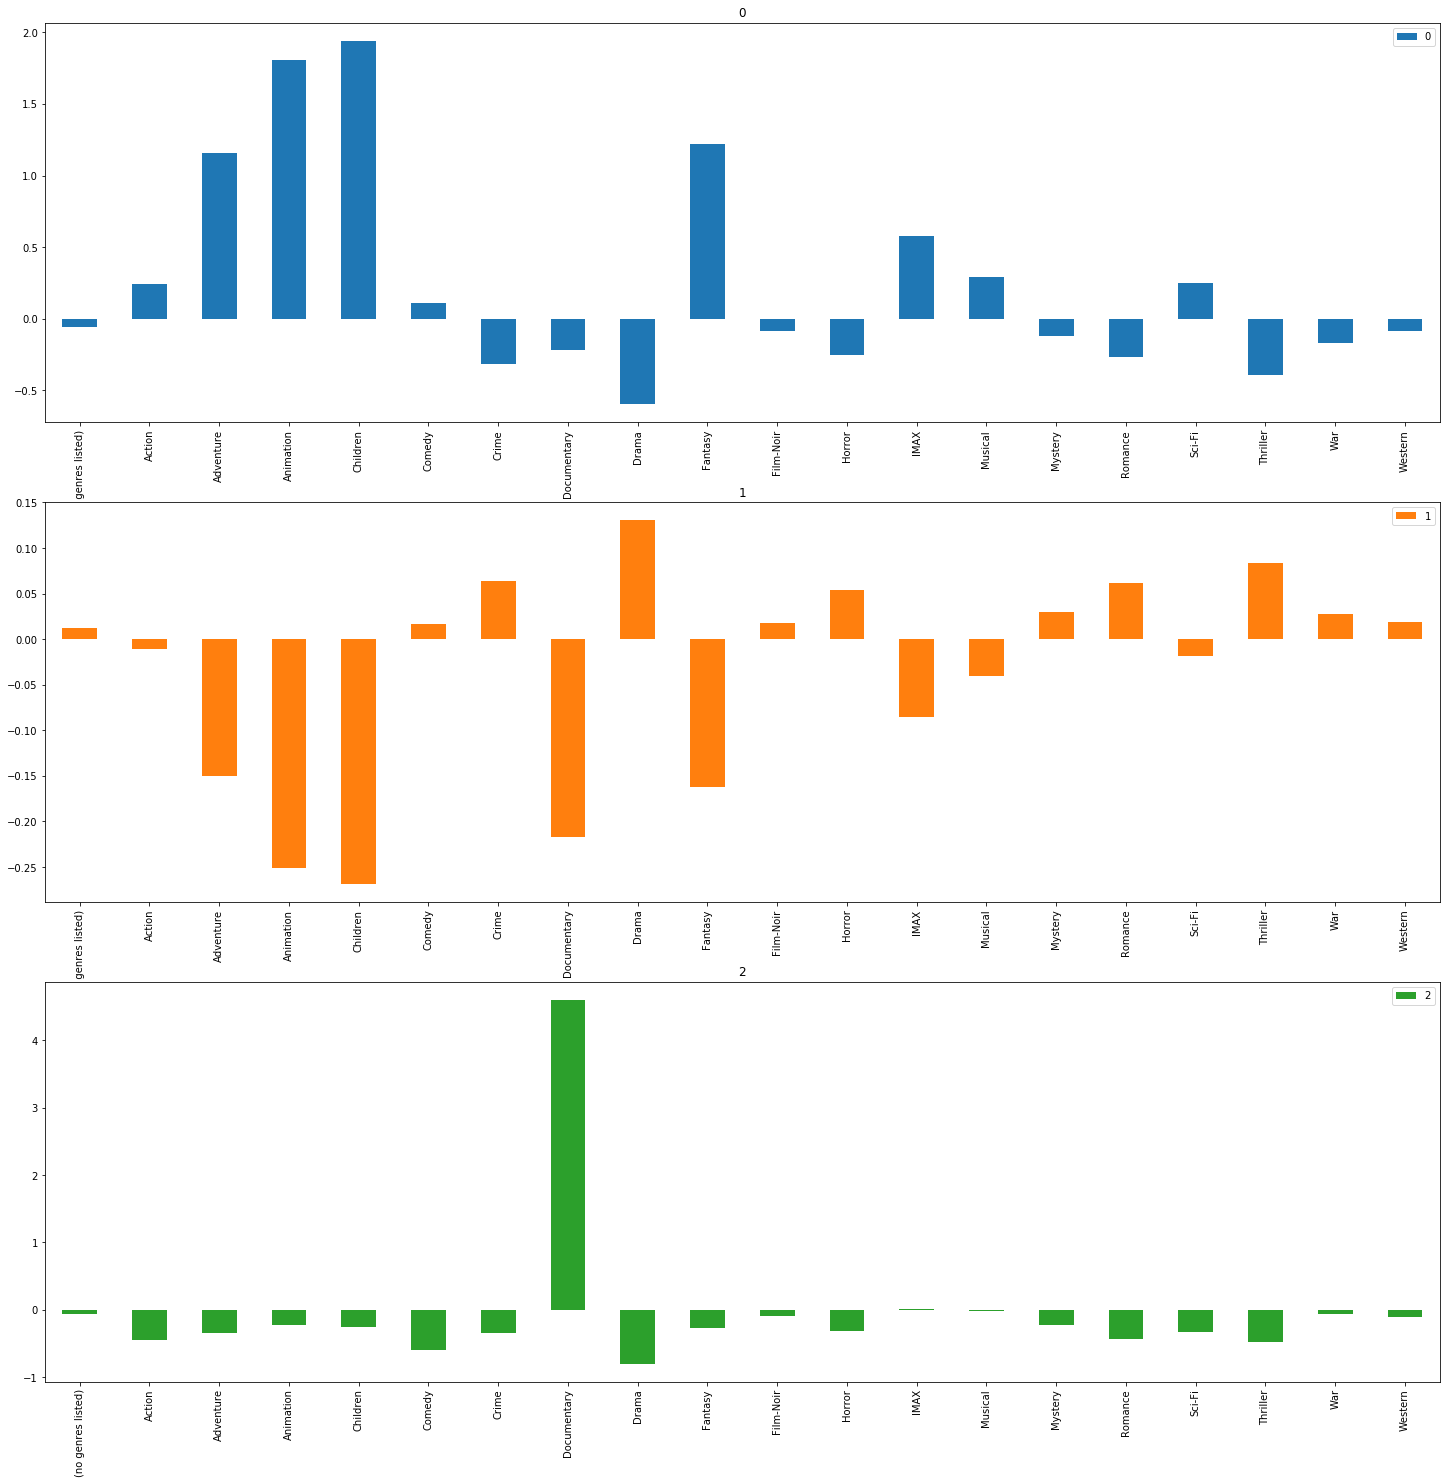

In [35]:
# No grafico acima, criamos os subplots em generos e nao em grupos.
# Resolvemos isso transpondo a matriz de grupos.
# Dessa forma, visualizamos de uma forma melhor quais categorias tem mais peso em cada um dos grupos. 
grupos.transpose().plot.bar(subplots=True, figsize=(25, 25), sharex=False)

# Filtrando os filmes pelos grupos gerados pelo KMeans, para análise

In [40]:
# Analisaremos, por exemplo, o grupo 0. Pelo grafico acima, vemos que os generos animacao, aventura, infantil e fantasia tem um peso maior.
# Vamos filtrar quais filmes o algoritmo do K-Means separou nesse grupo e ver se esses filmes estao mesmo de acordo.
grupo = 0

filtro = modelo.labels_ == grupo # do modelo do KMeans, marca como True todos os filmes que pertencem ao grupo 0 e retorna a array

print(filtro) # esse array contem um True para cada linha que pertence ao grupo 0
print(dados_dos_filmes)

dados_dos_filmes[filtro].sample(10) # traz somente as linhas marcadas como True, em uma amostra de 10 registros

# Esse filtro seria util no caso de, por exemplo, queremos indicar um novo filme a alguem que tenha assistido a um documentario da Discovery.
# Bastaria aplicarmos o filtro grupo=2 aos dados_dos_filmes, selecionar alguns dos registros do resultado e exibir ao telespectador.

[ True  True False ... False  True False]
      filme_id                                     titulo  ... War  Western
0            1                           Toy Story (1995)  ...   0        0
1            2                             Jumanji (1995)  ...   0        0
2            3                    Grumpier Old Men (1995)  ...   0        0
3            4                   Waiting to Exhale (1995)  ...   0        0
4            5         Father of the Bride Part II (1995)  ...   0        0
...        ...                                        ...  ...  ..      ...
9737    193581  Black Butler: Book of the Atlantic (2017)  ...   0        0
9738    193583               No Game No Life: Zero (2017)  ...   0        0
9739    193585                               Flint (2017)  ...   0        0
9740    193587        Bungo Stray Dogs: Dead Apple (2018)  ...   0        0
9741    193609        Andrew Dice Clay: Dice Rules (1991)  ...   0        0

[9742 rows x 23 columns]


,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1287,1713,Mouse Hunt (1997),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2182,2899,Gulliver's Travels (1939),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8676,122246,Tooth Fairy 2 (2012),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1507,2035,Blackbeard's Ghost (1968),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8841,132362,Patlabor 2: The Movie (1993),Action|Animation|Sci-Fi,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5490,26340,"Twelve Tasks of Asterix, The (Les douze travau...",Action|Adventure|Animation|Children|Comedy|Fan...,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6149,44022,Ice Age 2: The Meltdown (2006),Adventure|Animation|Children|Comedy,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8552,115819,Mr Hublot (2013),Animation|Comedy,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9237,153236,Genius Party (2007),Animation,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
